In [75]:
# Python version
import sys
import os

# scipy
import scipy
# numpy
import numpy
# matplotlib
import matplotlib
# scikit-learn
import sklearn
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib import ticker
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd


my_imputer = SimpleImputer()


print('Python: {}'.format(sys.version))
print('scipy: {}'.format(scipy.__version__))
print('numpy: {}'.format(numpy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pandas.__version__))
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
scipy: 1.1.0
numpy: 1.14.5
matplotlib: 2.2.2
pandas: 0.23.3
sklearn: 0.20.3


In [4]:
#lendo a tabela
url = '15_1_2019.xlsx'
data = pandas.read_excel(url)

In [5]:
#Retirando os dados do questionário e alguns não úteis para mim ("PCR/10", "Lact", "Lac (mmol/L)")
dataset=data.drop(["PCR/10", "Lact", "Lac (mmol/L)", 'QLQ-C30 Q. 1', 'QLQ-C30 Q. 2', 
                   'QLQ-C30 Q. 3', 'QLQ-C30 Q. 4', 'QLQ-C30 Q. 5', 'QLQ-C30 Q. 10', 
                   'QLQ-C30 Q. 12', 'QLQ-C30 Q. 18', 'QLQ-C30 Q. 13'], axis=1)

## Declarando umas funções

In [6]:
#função para 
def alg_score1(data):
    array = data.values
    X1 = array[:,0:len(data.columns)-1]
    Y = array[:,len(data.columns)-1]

    #substituindo nan pela média
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp.fit(X1)
    X = imp.transform(X1)


    validation_size = 0.20
    seed = 7
    X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

    # Test options and evaluation metric
    seed = 7
    scoring = 'accuracy'

    # Spot Check Algorithms

    models = []
    models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC(gamma='auto')))
    
    results2=[]
    names=[]

    for name, model in models:
        model.fit(X_train, Y_train)
        predictions = model.predict(X_validation)
        results2.append(accuracy_score(Y_validation, predictions))
        names.append(name)

    
    
    return(results2)

In [7]:
#função que mostra a estimativa de accuracy média para cada algoritmo de ML
def alg_score(data):
    #carregando os dados
    array = data.values
    X1 = array[:,0:len(data.columns)-1]
    Y = array[:,len(data.columns)-1]

    #substituindo nan pela média
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp.fit(X1)
    X = imp.transform(X1)


    validation_size = 0.20
    seed = 7
    X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

    # Test options and evaluation metric
    seed = 7
    scoring = 'accuracy'

    # Spot Check Algorithms

    models = []
    models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC(gamma='auto')))
    
    results=[]
    names=[]
    
    #esse loop vai guardar a média dos accuracies  
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring, error_score='raise')
        results.append(cv_results.mean())
        #names.append(name)
        #msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        #print(msg)
   
    return(results)

#adaptado de https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

In [8]:
#função que compara cada algoritmo de ML: accuracy, incerteza, gráfico boxplot
def alg_comp(data):
    array = data.values
    X1 = array[:,0:len(data.columns)-1]
    Y = array[:,len(data.columns)-1]

    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp.fit(X1)
    X = imp.transform(X1)


    validation_size = 0.20
    seed = 7
    X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

    # Test options and evaluation metric
    seed = 7
    scoring = 'accuracy'

    # Spot Check Algorithms

    models = []
    models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC(gamma='auto')))
    
    # evaluate each model in turn
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring, error_score='raise')
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

    # Compare Algorithms, grafico legal
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

#adaptado de https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

In [9]:
#função que monta a matriz de resultados no dataset de validação para cada algoritmo de ML
def alg_matrix(data):

    array = data.values
    X1 = array[:,0:len(data.columns)-1]
    Y = array[:,len(data.columns)-1]

    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp.fit(X1)
    X = imp.transform(X1)

    validation_size = 0.20
    seed = 7
    X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

    # Test options and evaluation metric
    seed = 7
    scoring = 'accuracy'

    # Spot Check Algorithms

    models = []
    models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC(gamma='auto')))

    #esse loop vai gerar os prints do resultado de accuracy, matriz de confusão e report  
    for name, model in models:
        model.fit(X_train, Y_train)
        predictions = model.predict(X_validation)
        print('TESTE DO MODELO ' + name)
        print(accuracy_score(Y_validation, predictions))
        print(confusion_matrix(Y_validation, predictions))
        print(classification_report(Y_validation, predictions))

#adaptado de https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

In [10]:
#essa é a função original que eu fiz para os algoritmos de ML, deixei aqui só por desencargo de consciência
def alg_comp_original(data):
    array = data.values
    X1 = array[:,0:len(data.columns)-1]
    Y = array[:,len(data.columns)-1]

    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp.fit(X1)
    X = imp.transform(X1)


    validation_size = 0.20
    seed = 7
    X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

    # Test options and evaluation metric
    seed = 7
    scoring = 'accuracy'

    # Spot Check Algorithms

    models = []
    models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC(gamma='auto')))
    # evaluate each model in turn
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring, error_score='raise')
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#        print(msg)

    # Compare Algorithms
#    fig = plt.figure()
#    fig.suptitle('Algorithm Comparison')
#    ax = fig.add_subplot(111)
#    plt.boxplot(results)
#    ax.set_xticklabels(names)
#    plt.show()
    
    results2=[]
    names=[]

    for name, model in models:
        model.fit(X_train, Y_train)
        predictions = model.predict(X_validation)
#        print('TESTE DO MODELO ' + name)
#        print(accuracy_score(Y_validation, predictions))
#        print(confusion_matrix(Y_validation, predictions))
#        print(classification_report(Y_validation, predictions))
        results2.append(accuracy_score(Y_validation, predictions))
        names.append(name)

        
    return(results2)
#adaptado de https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

## Analisando diferentes datasets e algoritmos de ML

In [11]:
#PRESTENÇÃO: aqui seleciono quais colunas eu quero manter e guardo em dataN
data1 = pd.DataFrame(dataset, columns = ['Δ PESO', '% PERDA PESO', 'IMC (kg/m²)', 
                                         'Hemoglobina (g/dL)', 'PCR (mg/L)',
                                         'Albumina (g/dL)', 'PCR/Albumina (mg/g)', 
                                         'Col', 'Col (HDL)', 'Glic', 'Trig',
                                         'ALT', 'AST', 'Col (LDL)', 'Creat', 'GRUPO (CLASSIF)'])
data2 = pd.DataFrame(dataset, columns = ['Δ PESO', '% PERDA PESO', 'IMC (kg/m²)', 
                                         'Hemoglobina (g/dL)', 'PCR (mg/L)', 
                                         'Albumina (g/dL)', 'PCR/Albumina (mg/g)', 
                                         'Col', 'Col (HDL)', 'Glic', 'Trig',
                                         'Col (LDL)', 'Creat', 'GRUPO (CLASSIF)'])
data3 = pd.DataFrame(dataset, columns = ['Δ PESO', '% PERDA PESO', 'IMC (kg/m²)', 
                                         'Hemoglobina (g/dL)', 'PCR (mg/L)', 
                                         'Albumina (g/dL)', 'PCR/Albumina (mg/g)', 
                                         'Col', 'Col (HDL)', 'Glic', 'Trig',
                                         'Col (LDL)', 'GRUPO (CLASSIF)'])
data4 = pd.DataFrame(dataset, columns = ['Δ PESO', '% PERDA PESO', 'IMC (kg/m²)', 
                                         'Hemoglobina (g/dL)', 'PCR (mg/L)', 
                                         'Albumina (g/dL)', 'PCR/Albumina (mg/g)', 
                                         'GRUPO (CLASSIF)'])
data5 = pd.DataFrame(dataset, columns = ['Δ PESO', '% PERDA PESO', 'IMC (kg/m²)',  
                                         'PCR (mg/L)', 'Albumina (g/dL)', 
                                         'PCR/Albumina (mg/g)', 'GRUPO (CLASSIF)'])
data6 = pd.DataFrame(dataset, columns = ['% PERDA PESO', 'IMC (kg/m²)',  'PCR (mg/L)', 
                                         'Albumina (g/dL)', 
                                         'PCR/Albumina (mg/g)', 'GRUPO (CLASSIF)'])
data7 = pd.DataFrame(dataset, columns = ['IMC (kg/m²)',  'PCR (mg/L)', 'Albumina (g/dL)',
                                         'PCR/Albumina (mg/g)', 'GRUPO (CLASSIF)'])

### Accuracy por algoritmo e dataset

In [12]:
#criando uma tabela com os accuracies de cada dataset e cada algoritmo
d = {'Dataset': alg_score(dataset), 'data1': alg_score(data1), 'data2': alg_score(data2), 'data3': alg_score(data3), 'data4': alg_score(data4), 'data5': alg_score(data5), 'data6': alg_score(data6), 'data7': alg_score(data7)}
tabelascore = pd.DataFrame(d, index=['LR', 'LDA','KNN', 'CART', 'NB', 'SVM'])
print(tabelascore)
#quanto mais perto de 1, melhor

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


       Dataset     data1     data2     data3     data4     data5     data6  \
LR    0.554474  0.538421  0.563947  0.568947  0.631316  0.631842  0.636316   
LDA   0.610263  0.609737  0.604474  0.584211  0.620789  0.599737  0.594737   
KNN   0.404211  0.393684  0.388684  0.388684  0.662895  0.663158  0.673158   
CART  0.568947  0.600789  0.590000  0.590526  0.565000  0.583947  0.624211   
NB    0.626842  0.662105  0.662105  0.641842  0.677368  0.682632  0.646579   
SVM   0.341842  0.341842  0.341842  0.341842  0.615263  0.589474  0.574211   

         data7  
LR    0.439211  
LDA   0.444737  
KNN   0.537105  
CART  0.416842  
NB    0.435263  
SVM   0.454474  


### Qual set de dados maximiza o accuracy score de cada algoritmo?

In [13]:
#print("Qual set de dados maximiza o accuracy score de cada algoritmo?")
d = {'Data': tabelascore.idxmax(1)} #acha qual dataset maximiza
d1 = pd.DataFrame(d, index=['LR', 'LDA','KNN', 'CART', 'NB', 'SVM'])
d = {'Score': tabelascore.max(axis=1)} #acha o valor da accuracy
d2 = pd.DataFrame(d, index=['LR', 'LDA','KNN', 'CART', 'NB', 'SVM'])

frame=[d1,d2]
maxalg = pd.concat(frame, axis=1, sort=False)
print(maxalg)


       Data     Score
LR    data6  0.636316
LDA   data4  0.620789
KNN   data6  0.673158
CART  data6  0.624211
NB    data5  0.682632
SVM   data4  0.615263


### Comparando os algoritmos de ML para o dataset "data6"

LR: 0.636316 (0.108661)
LDA: 0.594737 (0.127059)
KNN: 0.673158 (0.074885)
CART: 0.609211 (0.114830)
NB: 0.646579 (0.132356)
SVM: 0.574211 (0.107256)


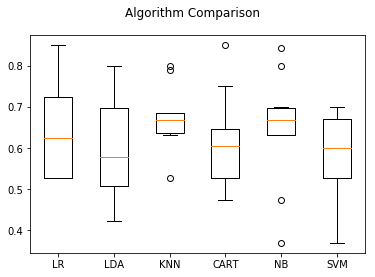

In [14]:
alg_comp(data6)

### Resultados dos algoritmos de ML para o dataset "data6"

In [15]:
alg_matrix(data6)

TESTE DO MODELO LR
0.6326530612244898
[[ 8  1  0  1]
 [ 3  4  0  0]
 [ 1  0 15  2]
 [ 1  0  9  4]]
              precision    recall  f1-score   support

          CC       0.62      0.80      0.70        10
         CC+       0.80      0.57      0.67         7
     CONTROL       0.62      0.83      0.71        18
         WSC       0.57      0.29      0.38        14

   micro avg       0.63      0.63      0.63        49
   macro avg       0.65      0.62      0.61        49
weighted avg       0.63      0.63      0.61        49

TESTE DO MODELO LDA
0.6122448979591837
[[ 7  1  0  2]
 [ 3  4  0  0]
 [ 1  0 15  2]
 [ 1  0  9  4]]
              precision    recall  f1-score   support

          CC       0.58      0.70      0.64        10
         CC+       0.80      0.57      0.67         7
     CONTROL       0.62      0.83      0.71        18
         WSC       0.50      0.29      0.36        14

   micro avg       0.61      0.61      0.61        49
   macro avg       0.63      0.60      0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## PCA

### Definindo algumas funções para facilitar

In [59]:
#essa função aqui retorna uma tabela com os n componentes do PCA
def PCArotina(df, n): 
    features=list(df.columns)
    features.remove('GRUPO (CLASSIF)')
    x = df.loc[:, features].values     # Separating out the features
    y = df.loc[:,['GRUPO (CLASSIF)']].values     # Separating out the target

    #trocando os NaN pela média
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp.fit(x)
    x = imp.transform(x)

    x = StandardScaler().fit_transform(x) # precisa normalizar

    #aqui começa o PCA mesmo!
    #from sklearn.decomposition import PCA
    pca = PCA(n_components=n) #número de componentes do PCA
    coluna=[]
    
    for i in range(n):
        aux='principal component '+ str(i+1)
        coluna.append(aux)
    
    #aqui faz a tabela
    principalComponents = pca.fit_transform(x) 
    principalDf = pd.DataFrame(data = principalComponents
                 , columns=coluna)
    finalDf = pd.concat([principalDf, df[['GRUPO (CLASSIF)']]], axis = 1)
    
    return {"pca": pca,
            "data": finalDf,
            "features": features}

In [53]:
#essa função mostra o quanto de informação (variância) está guardada por número total de componentes do PCA 
def PCAnum(df):
    features=list(df.columns)
    features.remove('GRUPO (CLASSIF)')
    # Separating out the features
    x = df.loc[:, features].values
    
    #trocando os NaN pela média
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp.fit(x)
    x = imp.transform(x)
    # Standardizing the features
    x = StandardScaler().fit_transform(x)
    
    #calcula e faz o gráfico
    pca = PCA().fit(x)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');

In [60]:
df.shape

(241, 16)

In [61]:
out = PCArotina(df, 2)

In [62]:
pca = out["pca"]
features = out["features"]

pca_comps = pd.DataFrame(pca.components_,columns=features,index = ['PC-1','PC-2'])


In [93]:
import matplotlib.colors as colors

def plot_confusion_matrix(cm, title='Confusion matrix', cmap="RdBu", labels=None):
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111)
    
    bounds = np.linspace(-1.5, 1.5)
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

    # I also added cmap=cmap here, to make use of the 
    # colormap you specify in the function call
    cax = ax.matshow(cm, cmap=cmap, norm=norm)
    plt.title(title)
    fig.colorbar(cax)
    if labels:
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig('confusionmatrix.png')

In [96]:
pca_comps.T

PC-1      PC-2
Δ PESO               0.335197  0.362104
% PERDA PESO         0.347141  0.390076
IMC (kg/m²)         -0.229542 -0.296037
Hemoglobina (g/dL)  -0.297989 -0.224970
PCR (mg/L)           0.333282  0.086276
Albumina (g/dL)     -0.366022  0.217896
PCR/Albumina (mg/g)  0.375470 -0.025686
Col                 -0.294304  0.467334
Col (HDL)           -0.215461  0.315733
Glic                -0.042094 -0.053907
Trig                -0.156730  0.144608
ALT                 -0.084019 -0.017956
AST                 -0.038116 -0.007669
Col (LDL)           -0.259611  0.422841
Creat               -0.065862 -0.042529

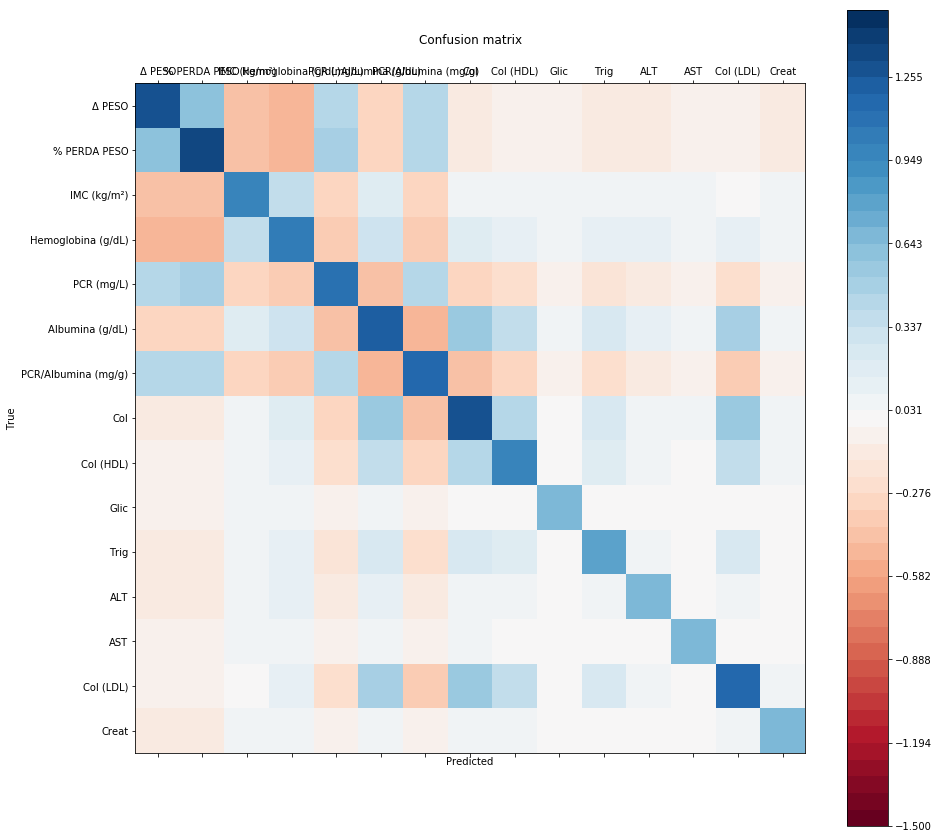

In [95]:

plot_confusion_matrix(pca.get_covariance(), labels=features)

### Quanto de "informação" eu retenho por número de componentes?

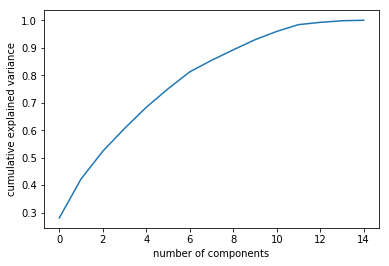

In [18]:
#vou usar o data1
df=data1.drop([180], axis=0) #tem alguma caca com o paciente 180 :( 
df.reset_index(drop=True, inplace=True)
PCAnum(df)

### PCA de duas componentes

In [19]:
finalDf=PCArotina(df,2)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['CC', 'CC+', 'WSC', 'CONTROL']
colors = ["green", "red", "orange", "blue"]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['GRUPO (CLASSIF)'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### PCA de 3 componentes

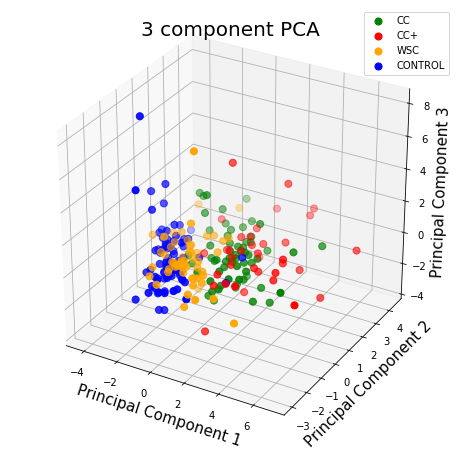

In [52]:
from mpl_toolkits.mplot3d import Axes3D

finalDf=PCArotina(df,3)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1, projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = ['CC', 'CC+', 'WSC', 'CONTROL']
colors = ["green", "red", "orange", "blue"]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['GRUPO (CLASSIF)'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], 
               finalDf.loc[indicesToKeep, 'principal component 2'], 
               finalDf.loc[indicesToKeep, 'principal component 3'], c = color, s = 50)
ax.legend(targets)
ax.grid()

## Support Vector Machines

"Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection"
Não ficou bom. Ler depois: https://scikit-learn.org/stable/modules/svm.html#svm-classification

In [23]:
def SVC_teste(Xt, it):
    #tirei daqui: https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py

    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn import svm, datasets


    def make_meshgrid(x, y, h=.02):
        """Create a mesh of points to plot in

        Parameters
        ----------
        x: data to base x-axis meshgrid on
        y: data to base y-axis meshgrid on
        h: stepsize for meshgrid, optional

        Returns
        -------
        xx, yy : ndarray
        """
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        return xx, yy


    def plot_contours(ax, clf, xx, yy, **params):
        """Plot the decision boundaries for a classifier.

        Parameters
        ----------
        ax: matplotlib axes object
        clf: a classifier
        xx: meshgrid ndarray
        yy: meshgrid ndarray
        params: dictionary of params to pass to contourf, optional
        """
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
        return out

    def legenda(y):
        if y == 0:
            return 'CONTROL'
        elif y == 1:
            return 'WSC'
        elif y == 2:
            return 'CC'
        else:
            return 'CC+'


    # import some data to play with
    #iris = datasets.load_iris()
    # Take the first two features. We could avoid this by using a two-dim dataset
    #X = iris.data[:, :2]
    #print(type(X))
    #y = iris.target
    #print(y)

    #Xt = dataset.values[:, 8:10]
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp.fit(Xt)
    X = imp.transform(Xt)
    y = dataset.values[:,len(dataset.columns)-1]
    y=np.where(y=='CONTROL', 0, y)
    y=np.where(y=='WSC', 1, y)
    y=np.where(y=='CC', 2, y)
    y=np.where(y=='CC+', 3, y)
    y=y.astype('int')#o numpy às vezes crica com o tipo 

    #print("TO AQUI ANTES DOS MODELOS")
    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    C = 1.0  # SVM regularization parameter
    models = (svm.SVC(kernel='linear', C=C, max_iter=it),
              svm.LinearSVC(C=C, max_iter=it),
              svm.SVC(kernel='rbf', gamma=0.7, C=C, max_iter=it),
              svm.SVC(kernel='poly', degree=3, C=C, max_iter=it))
    models = (clf.fit(X, y) for clf in models)
    #print("TO AQUI DEPOIS DOS MODELOS")

    # title for the plots
    titles = ('SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel')

    # Set-up 2x2 grid for plotting.

    fig, sub = plt.subplots(2, 2, figsize=(10,10))
    plt.subplots_adjust(wspace=0.1, hspace=0.2)

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub.flatten()):    
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('parâmetro1')
        ax.set_ylabel('parâmetro2')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)
        #plt.legend(loc=2)


    plt.show()

/Users/natasha/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/natasha/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/natasha/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/natasha/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self

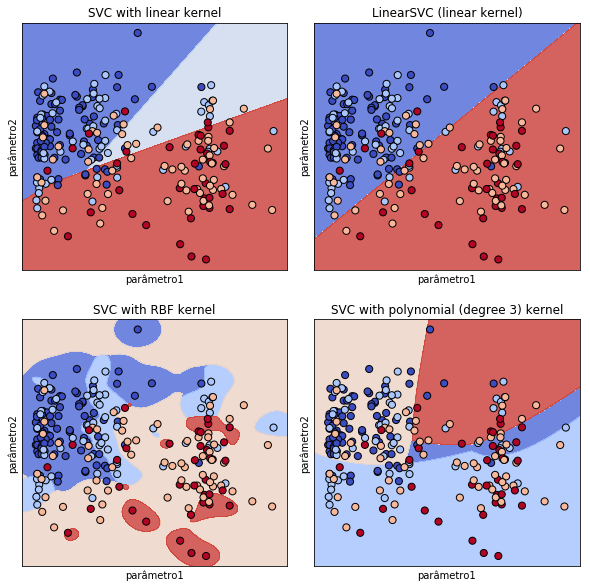

In [24]:
teste = pd.DataFrame(dataset, columns = ['PCR (mg/L)', 'IMC (kg/m²)'])
SVC_teste(teste,1000)

## Clusterização

### KMeans

Acabei de ler que esse algoritmo não funciona para grupos de dados em formato 'alongado'. Dã!
Ler depois: https://scikit-learn.org/stable/modules/clustering.html

In [112]:
from sklearn.cluster import KMeans
#trocar o  pelas  colunas que deseja fazer o scatter
xcol='Albumina (g/dL)'
ycol='PCR (mg/L)'

teste = pd.DataFrame(dataset, columns = [xcol, ycol])
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(teste)
X = imp.transform(teste)



kmeans=KMeans(n_clusters = 4)
kmeans.fit(X)


plt.subplots_adjust(hspace=0.1, wspace=0.1)
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:,1], s = 50, c = kmeans.labels_, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red',label = 'Centroids')
plt.title('Clusters and Centroids')
plt.xlabel(xcol)
plt.ylabel(ycol)
plt.legend()



x = list(dataset[[xcol]].T.squeeze())
y=list(dataset[[ycol]].T.squeeze())

def corzinha(x):
    if x == 'CC':
        return 'green'
    elif x == 'CC+':
        return 'red'
    elif x == 'WSC':
        return 'orange'
    else:
        return 'blue'

groups = list(dataset[['GRUPO (CLASSIF)']].T.squeeze())    
colors_palette = {'CC': "green", 'CC+': "red", 'WSC': "orange", 'CONTROL': "blue"}
colors = [colors_palette[c] for c in groups]  
    
#print(groups)
plt.subplot(1,2,2)
plt.title('Scatter Unitário')
plt.xlabel(xcol)
plt.ylabel(ycol)
cs=plt.scatter(x,y,color=colors, alpha=0.7, s=50)
for cor in ["CONTROL", "WSC", "CC", "CC+"]:
    plt.scatter([], [], c=corzinha(cor), alpha=0.7, label=cor, s=50)
plt.legend(scatterpoints=1, frameon=False, labelspacing=1)
plt.legend(loc='best')

plt.show()

<Figure size 432x288 with 0 Axes>

In [126]:
df=data1.drop([180], axis=0) #tem alguma caca com o paciente 180 :( 
df.reset_index(drop=True, inplace=True)
finalDf=PCArotina(df,2)

#TESTE
centro = np.array([[-1,-1],
                   [0,-0.5],
                   [2,1],
                   [3,2]],
                 np.float64)

X=finalDf.drop('GRUPO (CLASSIF)', axis=1)
kmeans=KMeans(n_clusters = 4, init=centro, max_iter=1000)
kmeans.fit(X)

plt.subplots_adjust(hspace=0.1, wspace=0.1)
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(X.values[:, 0], X.values[:,1], s = 50, alpha=0.7, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red',label = 'Centroids')
plt.title('Clusters and Centroids')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.legend()


x = list(finalDf[['principal component 1']].T.squeeze())
y=list(finalDf[['principal component 2']].T.squeeze())
groups = list(finalDf[['GRUPO (CLASSIF)']].T.squeeze())  

colors_palette = {'CC': "green", 'CC+': "red", 'WSC': "orange", 'CONTROL': "blue"}
colors = [colors_palette[c] for c in groups]  
    
#print(groups)
plt.subplot(1,2,2)
plt.title('PCA')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
cs=plt.scatter(x,y,color=colors, alpha=0.7, s=50)
for cor in ["CONTROL", "WSC", "CC", "CC+"]:
    plt.scatter([], [], c=corzinha(cor), alpha=0.7, label=cor, s=50)
plt.legend(scatterpoints=1, frameon=False, labelspacing=1)
plt.legend(loc='best')

plt.show()

/Users/natasha/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


<Figure size 432x288 with 0 Axes>